#### Fluorescence Plaques

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PyPlaque.experiment import ExperimentFluorescencePlaque
from PyPlaque.utils import remove_background, plot_virus_contours
from PyPlaque.view import PlateReadout

np.random.seed(0)

/Users/de29/Applications/miniforge3/envs/pyplaque/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Initialising parameters and data

In [2]:
#loading multiple plates and plate masks as an experiment
base_dir = '../../../data_backup/samples_fluorescent_plaques/'
exp = ExperimentFluorescencePlaque(base_dir+'images',base_dir+'masks',params = None) # default values in class, option to update

In [3]:
#In this case, the individual plates are of 384 well plates for fluorescence plaques and
#their corresponding mask directories. Make sure to have similar directories for images and masks(even if empty)
plate_dirs, plate_mask_dirs = exp.get_individual_plates(folder_pattern=r'^200601')

print(plate_dirs, plate_mask_dirs)

#We are choosing via the pattern above to ignore all other plates other than this one
print(exp.get_number_of_plates())
 

['200601-zplate-g2'] ['200601-zplate-g2']
1


In [4]:
#Example considering 1 particular well A01 for channel w1 from the selected plate
plate_dict_w1 = exp.load_wells_for_plate_nuclei(plate_id=0,additional_subfolders='2020-06-03/2072',file_pattern=r'_A01_s1_w1')
print(plate_dict_w1.keys())

768it [00:00, 158485.88it/s]
  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:08<00:00,  8.40s/it]
1it [00:08,  8.40s/it]
1it [00:08,  8.39s/it]

dict_keys(['200601-zplate-g2'])


../../../data_backup/samples_fluorescent_plaques/images/200601-zplate-g2/2020-06-03/2072/200601-zplate-g2_A01_s1_w1.tif


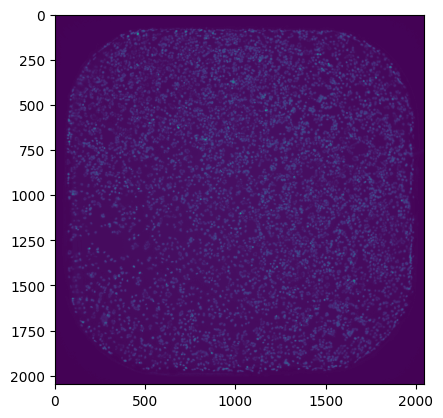

In [5]:
print(plate_dict_w1['200601-zplate-g2']['image_name'][0])
plt.imshow(plate_dict_w1['200601-zplate-g2']['img'][0])

In [6]:
#Example considering all wells for channel w1 from the selected plate
#Masks are generated based on the params given or the default at load time, masks can be saved in the mask directory for future use
plate_dict_w1 = exp.load_wells_for_plate_nuclei(plate_id=0,additional_subfolders='2020-06-03/2072',file_pattern=r'_([A-C]{1})1([1-4]{1})_s1_w1') #'_w1'
print(plate_dict_w1.keys())

768it [00:00, 176718.54it/s]
  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [01:40<00:00,  8.38s/it]
12it [01:40,  8.38s/it]
12it [01:40,  8.38s/it]

dict_keys(['200601-zplate-g2'])


In [7]:
print(len(plate_dict_w1[plate_dirs[0]]['img']))

12


In [8]:
#Example considering all wells for channel w2 from the selected plate
#Masks are generated based on the params given or the default at load time, masks can be saved in the mask directory for future use
plate_dict_w2 = exp.load_wells_for_plate_virus(plate_id=0,additional_subfolders='2020-06-03/2072',file_pattern=r'_([A-C]{1})1([1-4]{1})_s1_w2') #'_w2'
print(plate_dict_w2.keys())

768it [00:00, 305358.37it/s]
100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

dict_keys(['200601-zplate-g2'])


In [9]:
print(len(plate_dict_w2[plate_dirs[0]]['img']))

12


In [10]:
img = plate_dict_w2[plate_dirs[0]]['img'][0]

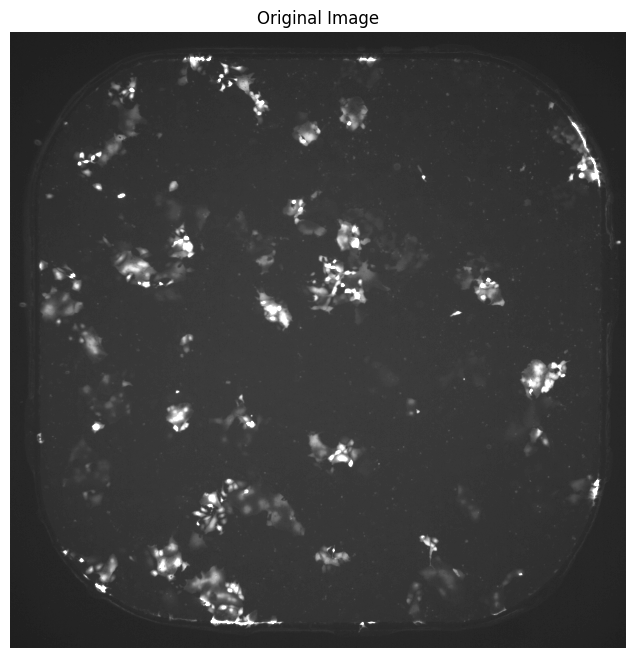

In [11]:
_, ax = plt.subplots(figsize=(8, 8))

# Display inputImage with custom colormap and intensity range
ax.imshow(img, cmap='gray', vmin=500, vmax=6000, alpha=1, extent=[0, 
                                            img.shape[1], img.shape[0], 0])
ax.axis('off')

ax.set_title('Original Image')
# plt.savefig("../../../manuscript/figs/fp_original_image_w2.png", bbox_inches='tight')
plt.show()

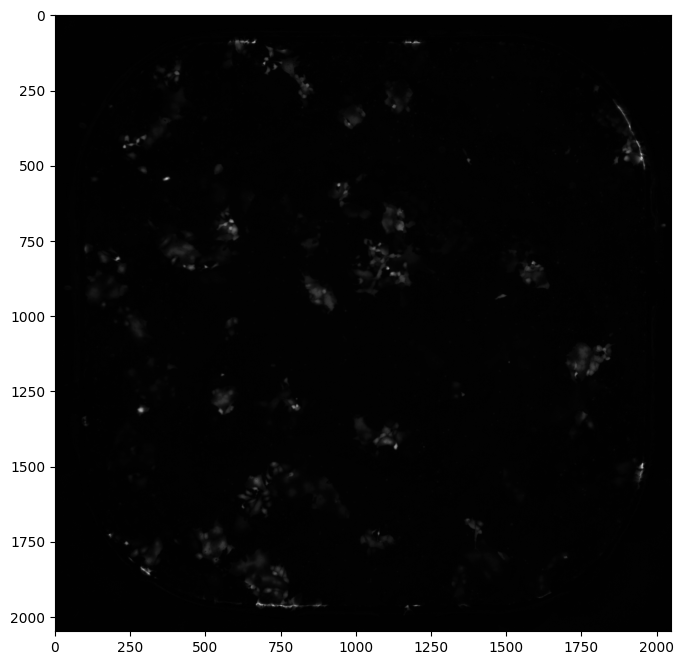

In [12]:
_, bg_removed_img = remove_background(img,
                                  radius=exp.params['virus']['correction_ball_radius'])

_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(bg_removed_img,cmap='gray')
plt.show()

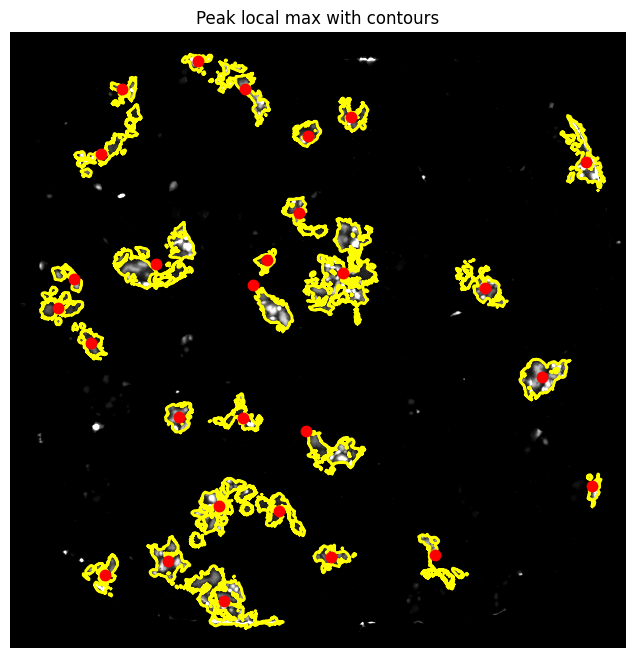

In [13]:
# Plotting the plaque contours along with the peak local maxima in each region
plot_virus_contours(img,virus_params=exp.params['virus'])

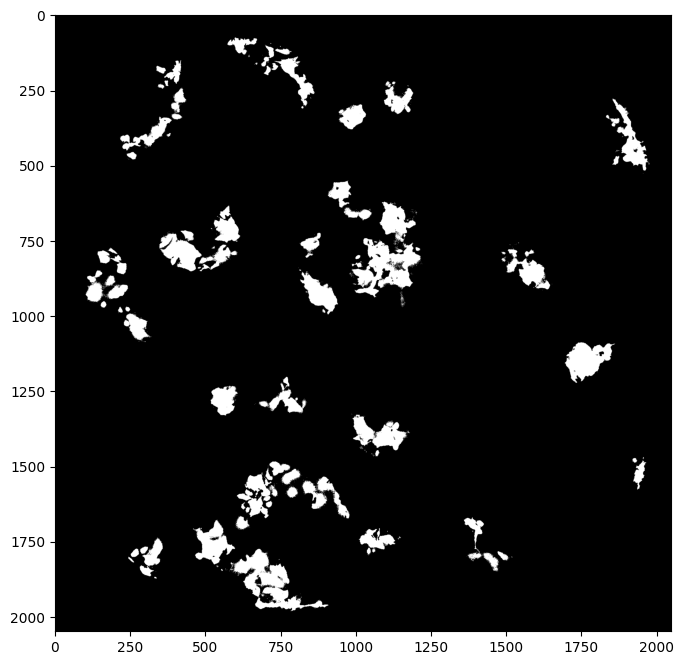

In [14]:
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(plate_dict_w2[plate_dirs[0]]['mask'][0],cmap='gray')
plt.show()

In [15]:
img = plate_dict_w1[plate_dirs[0]]['img'][0]

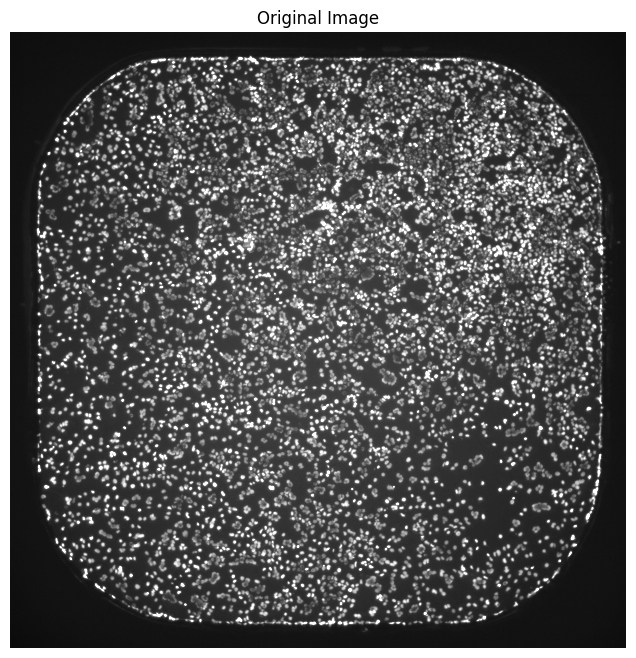

In [16]:
_, ax = plt.subplots(figsize=(8, 8))

# Display inputImage with custom colormap and intensity range
ax.imshow(img, cmap='gray', vmin=500, vmax=6000, alpha=1, extent=[0, 
                                            img.shape[1], img.shape[0], 0])
ax.axis('off')

ax.set_title('Original Image')
# plt.savefig("../../../manuscript/figs/fp_original_image_w1.png", bbox_inches='tight')
plt.show()

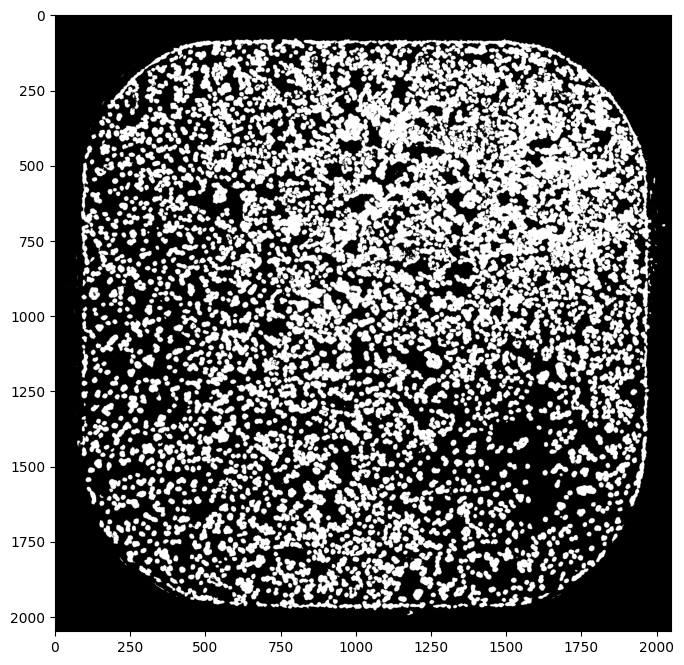

In [17]:
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(plate_dict_w1[plate_dirs[0]]['mask'][0],cmap='gray')
plt.show()

In [18]:
# Generating readouts for images as in PyPlaque
plate_readout = PlateReadout(experiment = exp, plate_id = 0, well_level_readouts=True, object_level_readouts=True)
abs_df_image, abs_df_object = plate_readout.generate_readouts_dataframe() # make sure to add row and column patterns here

100%|██████████| 12/12 [00:28<00:00,  2.38s/it]


In [19]:
abs_df_image

,NucleiImageName,VirusImageName,maxNucleiIntensity,totalNucleiIntensity,meanNucleiIntensity,numberOfNuclei,maxVirusIntensity,totalVirusIntensity,meanVirusIntensity,numberOfPlaques,numberOfInfectedNuclei
0,200601-zplate-g2_A11_s1_w1.tif,200601-zplate-g2_A11_s1_w2.tif,29518,8.826185e+09,1023.500000,17481,27657,7241332090,1726.468108,28,2379
1,200601-zplate-g2_A12_s1_w1.tif,200601-zplate-g2_A12_s1_w2.tif,32724,8.921454e+09,1023.500547,17578,29558,7179918904,1711.826063,29,2257
2,200601-zplate-g2_A13_s1_w1.tif,200601-zplate-g2_A13_s1_w2.tif,32691,9.022117e+09,1023.500441,18059,11473,6748545039,1608.978519,1,69
3,200601-zplate-g2_A14_s1_w1.tif,200601-zplate-g2_A14_s1_w2.tif,32727,8.890458e+09,1023.500000,17995,65535,6760565544,1611.844431,0,0
4,200601-zplate-g2_B11_s1_w1.tif,200601-zplate-g2_B11_s1_w2.tif,32579,8.237035e+09,1023.499354,14881,21967,7044377572,1679.510491,32,2096
5,200601-zplate-g2_B12_s1_w1.tif,200601-zplate-g2_B12_s1_w2.tif,32264,8.263427e+09,1023.498927,14791,30928,7069717524,1685.552007,26,1933
6,200601-zplate-g2_B13_s1_w1.tif,200601-zplate-g2_B13_s1_w2.tif,32504,8.663831e+09,1023.500270,16269,19421,6651261276,1585.784263,1,47
7,200601-zplate-g2_B14_s1_w1.tif,200601-zplate-g2_B14_s1_w2.tif,32373,8.634101e+09,1023.499971,16327,31223,6673374969,1591.056578,0,0
8,200601-zplate-g2_C11_s1_w1.tif,200601-zplate-g2_C11_s1_w2.tif,32479,8.873617e+09,1023.499705,17410,25132,7110491460,1695.273271,34,2118
9,200601-zplate-g2_C12_s1_w1.tif,200601-zplate-g2_C12_s1_w2.tif,32430,8.915507e+09,1023.500432,17862,37959,6978843370,1663.885920,23,1429


In [20]:
abs_df_object

,wellRow,wellColumn,Area,Centroid_1,Centroid_2,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Roundness,numberOfPeaks,numberOfNucleiInPlaque,numberOfInfectedNucleiInPlaque,maxIntensityGFP,totalIntensityGFP,meanIntensityGFP
0,A,11,6522.612903,1005.410624,814.300108,140.939647,74.543850,0.790540,10011.354839,0.267053,1.0,56.390133,44.641746,13134.354839,2.440231e+07,59.145226
1,A,12,6395.300000,1002.489548,1057.530786,127.692255,79.978626,0.702370,10081.366667,0.280010,1.0,61.220784,46.925098,12726.433333,2.407850e+07,56.826493
2,A,13,5844.000000,313.346338,1789.969199,534.812721,32.850653,0.998112,17716.000000,0.031211,2.0,162.670588,69.235294,6510.000000,1.806639e+07,142.441801
3,A,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
4,B,11,5567.781250,999.773338,1180.727750,123.455496,74.151295,0.733845,8870.812500,0.283976,1.0,46.491912,38.657721,11057.000000,1.991291e+07,54.531547
5,B,12,5869.428571,889.780141,1045.132192,121.412302,75.380707,0.744879,8925.892857,0.292832,1.0,47.944538,39.992017,11146.750000,2.127524e+07,54.489453
6,B,13,4027.000000,1374.993047,364.146014,174.871418,41.140870,0.971932,5978.000000,0.174423,1.0,56.823529,43.611765,6040.000000,1.258126e+07,57.986149
7,B,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
8,C,11,6669.037037,1145.554962,1008.768893,138.425194,75.865634,0.777968,10083.703704,0.275936,1.0,63.591721,48.691503,10732.703704,2.373143e+07,59.711433
9,C,12,4858.480000,904.687033,1114.382286,111.155940,70.126862,0.737888,7261.720000,0.282333,1.0,45.515294,36.134588,9085.560000,1.719353e+07,51.759145
